52216


Batches:   0%|          | 0/1632 [00:00<?, ?it/s]

2022-12-08 01:43:03,817 - BERTopic - Transformed documents to Embeddings
2022-12-08 01:43:23,097 - BERTopic - Reduced dimensionality
2022-12-08 01:43:35,493 - BERTopic - Clustered reduced embeddings


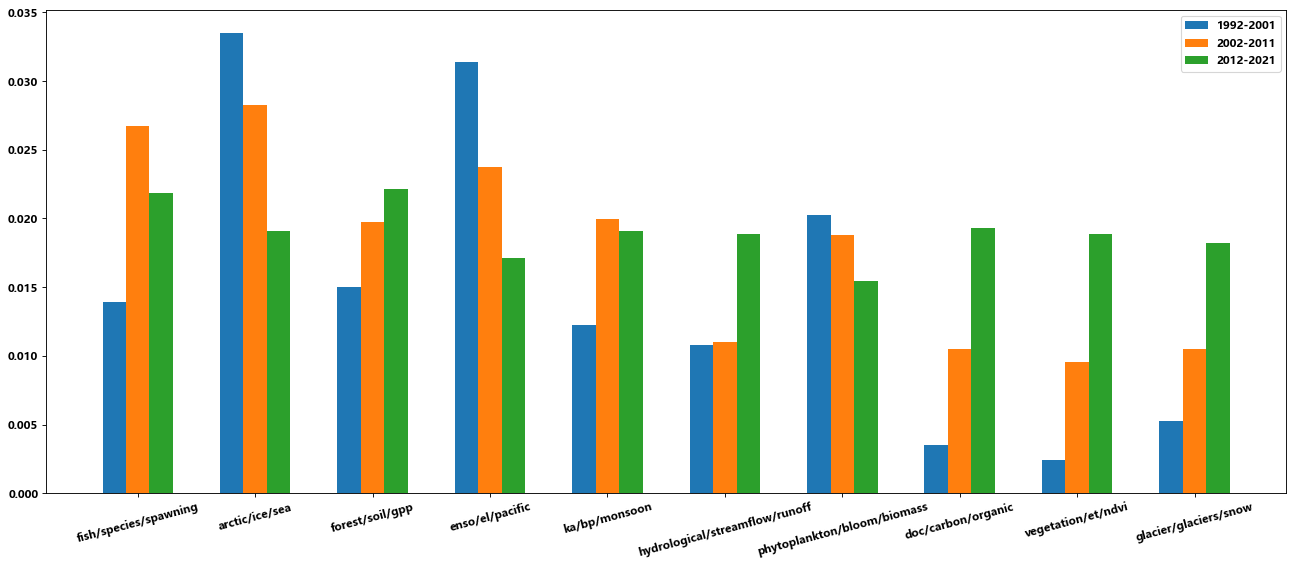

In [2]:
import pandas as pd 
import numpy as np 
from bertopic import BERTopic 
import os
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
import joblib
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

data_dir = 'D:/abstract/climate change/all_inter.csv'
df = pd.read_csv(data_dir, engine='python')

df_drop = df.dropna(subset='Abstract')
docs = df_drop['Abstract'].to_list()

print(len(docs))
vectorizer_model = CountVectorizer(stop_words="english")
cluster_model = KMeans(n_clusters=100)
model = BERTopic(hdbscan_model=cluster_model, vectorizer_model=vectorizer_model, verbose=True)

topics, probabilities = model.fit_transform(docs)
df_drop['topic'] = topics
#df_drop.to_csv('D:/abstract/climate change/all_inter_withtopic_100.csv', index=False)

df_trend = df_drop[['Publication Year','topic']]
trend = np.zeros([100,3])
for i in range(len(df_trend)):
    if df_trend.loc[i,'Publication Year']>=1992 and df_trend.loc[i,'Publication Year']<=2001:
        trend[df_trend.loc[i,'topic']][0] += 1
    elif df_trend.loc[i,'Publication Year']>=2002 and df_trend.loc[i,'Publication Year']<=2011:
        trend[df_trend.loc[i,'topic']][1] += 1
    elif df_trend.loc[i,'Publication Year']>=2012 and df_trend.loc[i,'Publication Year']<=2021:
        trend[df_trend.loc[i,'topic']][2] += 1
        
trend[:,0]=trend[:,0]/sum(trend[:,0])
trend[:,1]=trend[:,1]/sum(trend[:,1])
trend[:,2]=trend[:,2]/sum(trend[:,2])

topics = model.get_topics()
a = []
b = []
for i in range(10):
    t = topics[i][0][0]+'/'+topics[i][1][0]+'/'+topics[i][2][0]
    a.append(t)
for i in range(10,20):
    t = topics[i][0][0]+'/'+topics[i][1][0]+'/'+topics[i][2][0]
    b.append(t)
    
#设置中文字体
matplotlib.rc("font",family = 'MicroSoft YaHei',weight = 'bold' )

#数据
trend_10 = trend[:10]
first_decade = trend_10[:,0]
second_decade = trend_10[:,1]
third_decade = trend_10[:,2]

#设置图片大小
plt.figure(figsize=(20,8),dpi = 80)
#设置每条图形的宽度
bar_width = 0.2

#设置三个间距
x_14 = list(range(len(a)))
x_15 = [i+bar_width for i in x_14]
x_16 = [i+bar_width*2 for i in x_14]

#绘制横着的条形图
#plt.bar(range(len(a)),first_decade,width=0.2)
#plt.bar(x_15,second_decade,width=bar_width)
#plt.bar(x_16,third_decade,width=bar_width)
#plt.show()

#设置x轴的刻度
plt.xticks(x_15,a, rotation=15)

#绘制横着的条形图
plt.bar(range(len(a)),first_decade,width=0.2,label = "1992-2001")
plt.bar(x_15,second_decade,width=bar_width,label = "2002-2011")
plt.bar(x_16,third_decade,width=bar_width,label = "2012-2021")

#设置图例
plt.legend(loc=1)
plt.show()

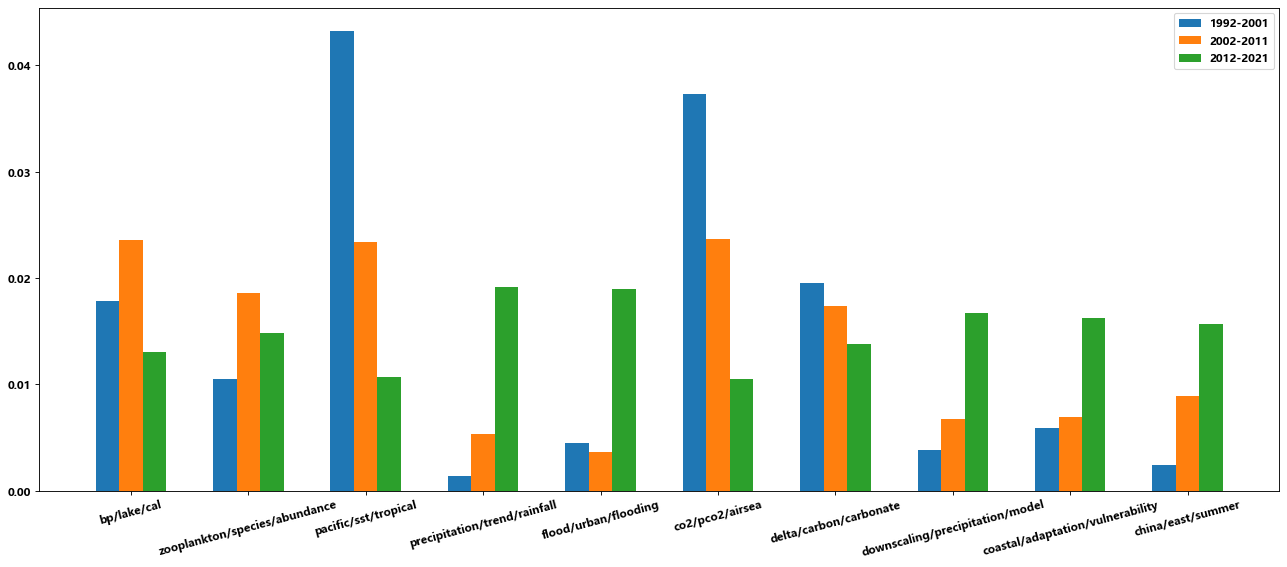

In [3]:
#数据
trend_20 = trend[10:20]
first_decade = trend_20[:,0]
second_decade = trend_20[:,1]
third_decade = trend_20[:,2]

#设置图片大小
plt.figure(figsize=(20,8),dpi = 80)
#设置每条图形的宽度
bar_width = 0.2

#设置三个间距
x_14 = list(range(len(b)))
x_15 = [i+bar_width for i in x_14]
x_16 = [i+bar_width*2 for i in x_14]

#绘制横着的条形图
#plt.bar(range(len(a)),first_decade,width=0.2)
#plt.bar(x_15,second_decade,width=bar_width)
#plt.bar(x_16,third_decade,width=bar_width)
#plt.show()

#设置x轴的刻度
plt.xticks(x_15,b, rotation=15)

#绘制横着的条形图
plt.bar(range(len(b)),first_decade,width=0.2,label = "1992-2001")
plt.bar(x_15,second_decade,width=bar_width,label = "2002-2011")
plt.bar(x_16,third_decade,width=bar_width,label = "2012-2021")

#设置图例
plt.legend(loc=1)
plt.show()

C:\Users\Velaciela\AppData\Local\Temp\ipykernel_37632\3486685439.py:20: RuntimeWarning: invalid value encountered in true_divide
  per_citation = citation/trend


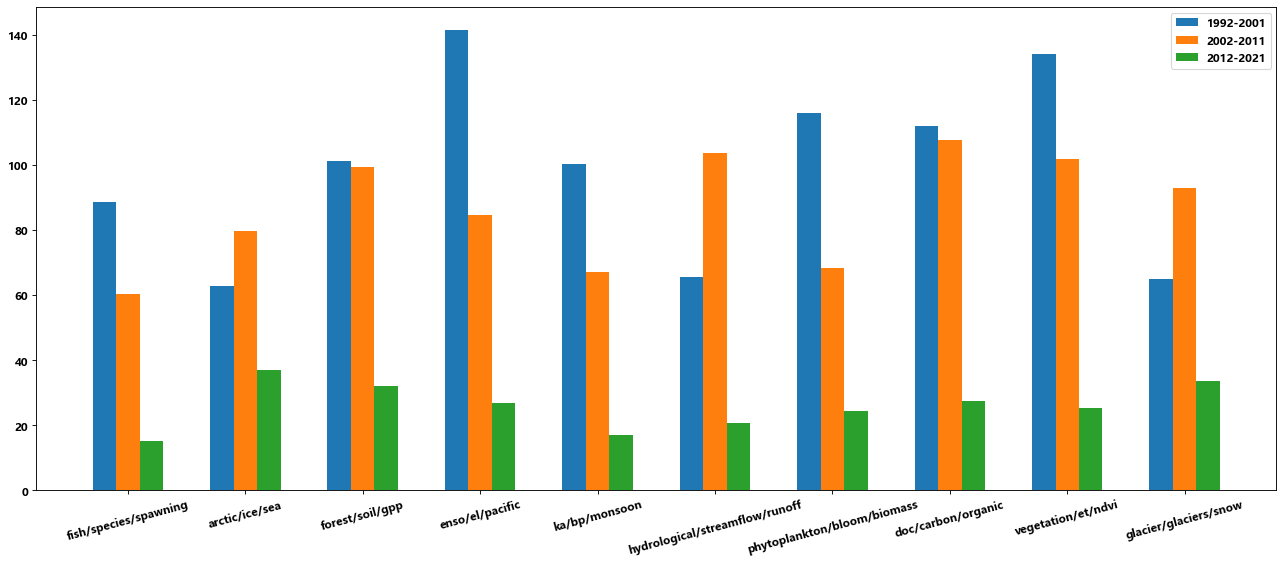

In [4]:
df_citation = df_drop[['Publication Year','Times Cited, WoS Core','topic']]
trend = np.zeros([100,3])
for i in range(len(df_citation)):
    if df_citation.loc[i,'Publication Year']>=1992 and df_citation.loc[i,'Publication Year']<=2001:
        trend[df_citation.loc[i,'topic']][0] += 1
    elif df_citation.loc[i,'Publication Year']>=2002 and df_citation.loc[i,'Publication Year']<=2011:
        trend[df_citation.loc[i,'topic']][1] += 1
    elif df_citation.loc[i,'Publication Year']>=2012 and df_citation.loc[i,'Publication Year']<=2021:
        trend[df_citation.loc[i,'topic']][2] += 1
        
citation = np.zeros([100,3])
for i in range(len(df_citation)):
    if df_citation.loc[i,'Publication Year']>=1992 and df_citation.loc[i,'Publication Year']<=2001:
        citation[df_citation.loc[i,'topic']][0] += df_citation.loc[i,'Times Cited, WoS Core']
    elif df_citation.loc[i,'Publication Year']>=2002 and df_citation.loc[i,'Publication Year']<=2011:
        citation[df_citation.loc[i,'topic']][1] += df_citation.loc[i,'Times Cited, WoS Core']
    elif df_citation.loc[i,'Publication Year']>=2012 and df_citation.loc[i,'Publication Year']<=2021:
        citation[df_citation.loc[i,'topic']][2] += df_citation.loc[i,'Times Cited, WoS Core']
        
per_citation = citation/trend

#设置中文字体
matplotlib.rc("font",family = 'MicroSoft YaHei',weight = 'bold' )

#数据
per_citation_10 = per_citation[:10]
first_decade = per_citation_10[:,0]
second_decade = per_citation_10[:,1]
third_decade = per_citation_10[:,2]

#设置图片大小
plt.figure(figsize=(20,8),dpi = 80)
#设置每条图形的宽度
bar_width = 0.2

#设置三个间距
x_14 = list(range(len(a)))
x_15 = [i+bar_width for i in x_14]
x_16 = [i+bar_width*2 for i in x_14]

#绘制横着的条形图
#plt.bar(range(len(a)),first_decade,width=0.2)
#plt.bar(x_15,second_decade,width=bar_width)
#plt.bar(x_16,third_decade,width=bar_width)
#plt.show()

#设置x轴的刻度
plt.xticks(x_15,a, rotation=15)

#绘制横着的条形图
plt.bar(range(len(a)),first_decade,width=0.2,label = "1992-2001")
plt.bar(x_15,second_decade,width=bar_width,label = "2002-2011")
plt.bar(x_16,third_decade,width=bar_width,label = "2012-2021")

#设置图例
plt.legend(loc=1)
plt.show()

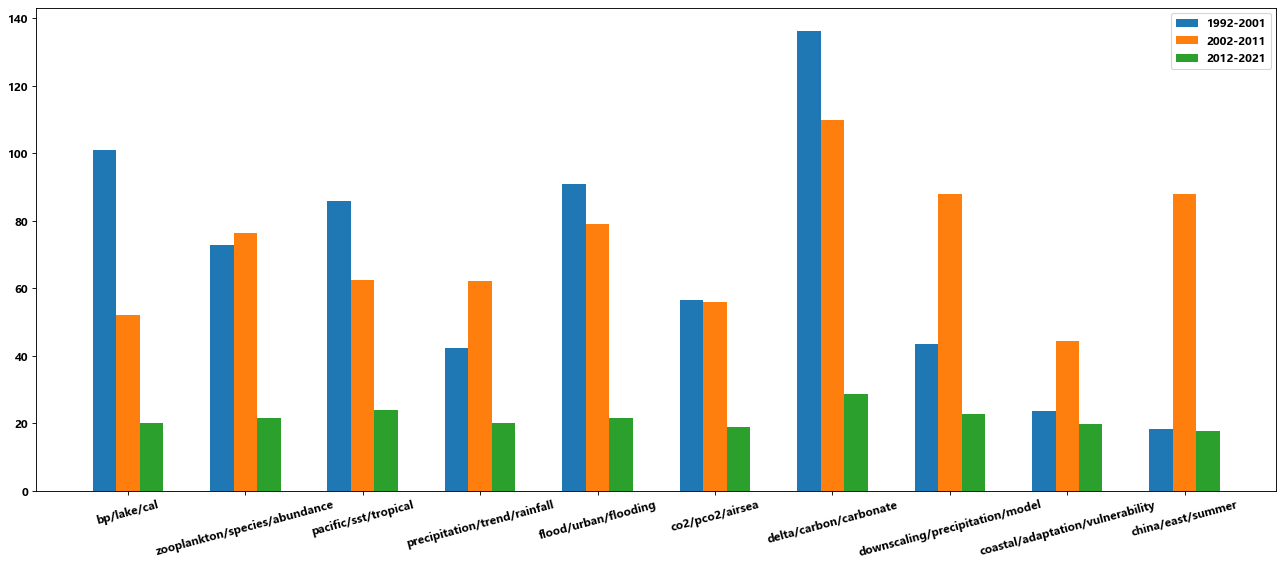

In [9]:
#数据
per_citation_10 = per_citation[10:20]
first_decade = per_citation_10[:,0]
second_decade = per_citation_10[:,1]
third_decade = per_citation_10[:,2]

#设置图片大小
plt.figure(figsize=(20,8),dpi = 80)
#设置每条图形的宽度
bar_width = 0.2

#设置三个间距
x_14 = list(range(len(b)))
x_15 = [i+bar_width for i in x_14]
x_16 = [i+bar_width*2 for i in x_14]

#绘制横着的条形图
#plt.bar(range(len(a)),first_decade,width=0.2)
#plt.bar(x_15,second_decade,width=bar_width)
#plt.bar(x_16,third_decade,width=bar_width)
#plt.show()

#设置x轴的刻度
plt.xticks(x_15,b, rotation=15)

#绘制横着的条形图
plt.bar(range(len(a)),first_decade,width=0.2,label = "1992-2001")
plt.bar(x_15,second_decade,width=bar_width,label = "2002-2011")
plt.bar(x_16,third_decade,width=bar_width,label = "2012-2021")

#设置图例
plt.legend(loc=1)
plt.show()

In [6]:
model.get_topics()

{0: [('fish', 0.032535357957245215),
  ('species', 0.024350800828206214),
  ('spawning', 0.018697794903150145),
  ('recruitment', 0.018064169364836322),
  ('abundance', 0.014659709359171692),
  ('fishing', 0.014450395633910335),
  ('habitat', 0.013682094918612298),
  ('cod', 0.01357047061395557),
  ('salmon', 0.01289619976527458),
  ('fisheries', 0.012257020116159811)],
 1: [('arctic', 0.04636053184397229),
  ('ice', 0.04212950586510128),
  ('sea', 0.025429793433205474),
  ('seaice', 0.01456923822127971),
  ('winter', 0.011861983072528216),
  ('warming', 0.011275892435151659),
  ('atmospheric', 0.010877986231779713),
  ('surface', 0.010601633842797175),
  ('albedo', 0.010131334846884086),
  ('snow', 0.009888514711470255)],
 2: [('forest', 0.019697943546886056),
  ('soil', 0.018683976734619023),
  ('gpp', 0.017310804027245327),
  ('vegetation', 0.016296535791674976),
  ('et', 0.01591759005572133),
  ('transpiration', 0.014233303006105523),
  ('ecosystem', 0.013442524528699673),
  ('cano